In [17]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

# Set the DataFram in pandas to show all columns and 5000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

# Load and Subset Data

<Item title:"SAC_Bird_Observations" type:Feature Layer Collection owner:Anooshi>
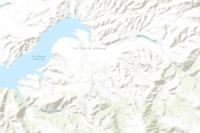

In [18]:
# Load data from arcGIS online for excel export
output = arcGIS_data_load('29bb77f439f0460a90cc2830a1345c60')

data = output['data0']
feature_service = output['feature_service']

In [19]:
# Subset data for desired year.
data.rename(columns={"Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 27


In [20]:
len(data)

99

# QAQC

In [21]:
validate_domains(feature_service)



Table/Layer:  SAC_Bird_Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor,"{Marina Olson, Kevin Sherrill, Ryan Anderson, Janel Mayo, Joy Stewart, Ryan Swanson}"


In [22]:
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Comments_L
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


In [23]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 27
# of columns:
 8


In [24]:
find_blank_entries(data, exclude_cols=['Comments_L'])

No blank Observation_Date
Blank Count_ entrie(s) exist!


,OBJECTID,Observation_Date,Species,Count_,Surveyor,GlobalID,Comments_L,SHAPE
95,120,2022-01-26 21:44:15,None,NaN,Dana Morawitz,2d6ed20c-42f9-41b4-a1b2-da7cf21aa271,"Single prop plane observed over North part of Indian Creek, flying...","{""x"": 6181590.557924547, ""y"": 2037107.9620708844, ""spatialReferenc..."
96,121,2022-01-26 22:04:55,None,NaN,Dana Morawitz,57aa440c-dea7-411b-883d-6fc0e700d951,"Helicopter observed flying overhead. Hard to judge how high, but l...","{""x"": 6181426.832123291, ""y"": 2037226.6507627508, ""spatialReferenc..."


No blank SHAPE
No blank OBJECTID
Blank Species entrie(s) exist!


,OBJECTID,Observation_Date,Species,Count_,Surveyor,GlobalID,Comments_L,SHAPE
95,120,2022-01-26 21:44:15,None,NaN,Dana Morawitz,2d6ed20c-42f9-41b4-a1b2-da7cf21aa271,"Single prop plane observed over North part of Indian Creek, flying...","{""x"": 6181590.557924547, ""y"": 2037107.9620708844, ""spatialReferenc..."
96,121,2022-01-26 22:04:55,None,NaN,Dana Morawitz,57aa440c-dea7-411b-883d-6fc0e700d951,"Helicopter observed flying overhead. Hard to judge how high, but l...","{""x"": 6181426.832123291, ""y"": 2037226.6507627508, ""spatialReferenc..."


No blank GlobalID
No blank Surveyor


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


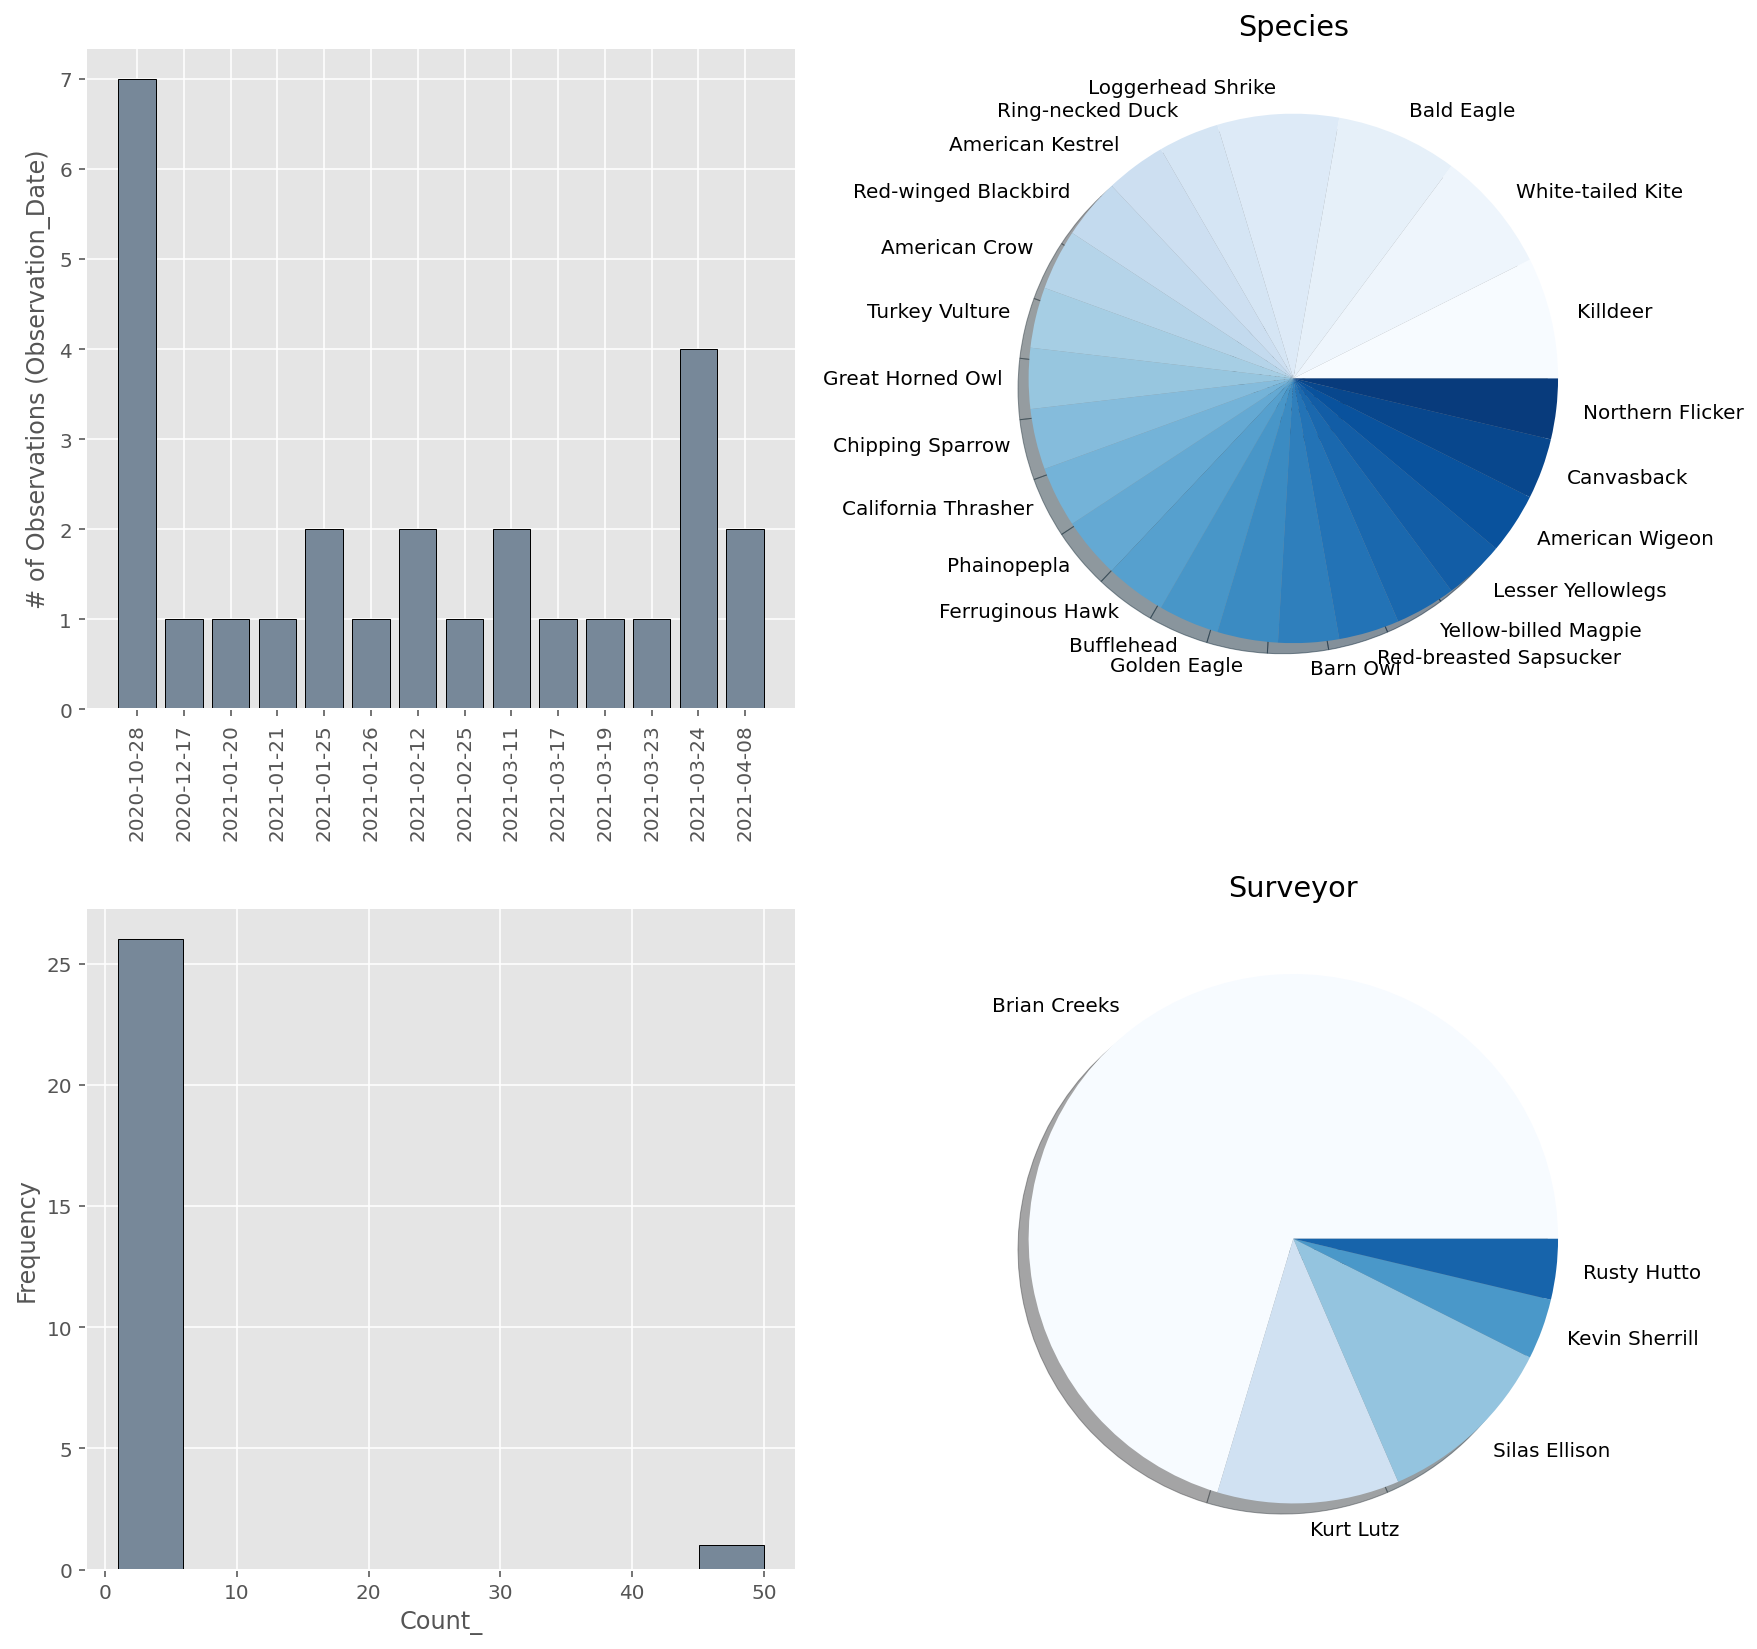

In [25]:
QAQC_plot(sub, [ 'Observation_Date', 'Species', 'Count_',
       'Surveyor'])

In [0]:
compare_years_catagorical(data,['Surveyor','Species'],'2019','2020')

In [0]:
compare_surveyors(sub, 'Species','Surveyor',5)

In [0]:
QAQC_attachment_filenames(feature_service)

In [0]:
data.columns

In [0]:
data = data.rename(columns={'':''})

In [0]:
field_order = [
    'Observation_Date',
    'Surveyor',
    'Species',
    'Count_',
    'Comments_L',
    'OBJECTID',
    'GlobalID',
    'SHAPE'
]

In [0]:
export_data_deliverable(data, feature_service, field_order, file_name='Bird_Observations')